# Спектры из SQLite3

In [1]:
import sqlite3 

con = sqlite3.connect("C:\\Data\\ARTA\\ARTM.s3db")
cur = con.cursor()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
sp_data = pd.read_sql("SELECT * FROM SP_DATA", con)
#sp_data.info()

hdr = pd.read_sql("SELECT * FROM HR_LIB_HDR", con)
hdr.head()

dhdr = pd.read_sql("SELECT * FROM HR_LIB_DHDR", con)
#dhdr.info()
dhdr.head()

,id_number,valid,mol_wt,bp,mp,xright,xleft,yorg,ymax,resolution,max_yval,min_yval,total_size,scans_sig,scans_bkg,ndata,lgain_sig,lgain_bkg,ap_type,casname,casnumber,desc1,mol_form,detector,sdata,nfactor
0,1,0,0.0,0.0,0.0,455.2,"4,400.0",0.0,1.0,4.0,0.9,-0.0,0,128,128,2046,1,1,0,ACRYLOID B-67 (FROM ALFA),,artm0001,,mct,"[""s"",""W"",""K"",""E"",""B"",""B"",""E"",""H"",""H"",""J"",""J"",""...","2,017.5"
1,2,0,0.0,0.0,0.0,455.2,"4,400.0",0.0,1.0,4.0,0.9,-0.0,0,128,128,2046,1,1,0,ACRYLOID B-72,,artm0002,,mct,"[""J"",""F"",""D"",""B"",""@"",""\u003e"",""="",""\u003c"",""\u...","1,446.2"
2,3,0,0.0,0.0,0.0,455.2,"4,400.0",0.0,1.0,4.0,0.9,-0.0,0,128,128,2046,2,2,0,ALFA-BOND; CASEIN #02298032276,,artm0003,,mct,"[""X"",""U"",""T"",""T"",""S"",""S"",""R"",""R"",""R"",""S"",""R"",""...","1,894.8"
3,4,0,0.0,0.0,0.0,455.2,"4,400.0",0.0,1.0,4.0,0.9,-0.0,0,128,128,2046,1,1,0,BATU EAST INDIA BOLD,,artm0004,,mct,"[""I"",""I"",""I"",""I"",""I"",""I"",""I"",""J"",""K"",""L"",""L"",""...","1,622.4"
4,5,0,0.0,0.0,0.0,455.2,"4,400.0",0.0,1.0,4.0,0.9,-0.0,0,128,128,2046,1,1,0,BLACK EAST INDIA UNSCRAPED,,artm0005,,mct,"[""@"",""?"",""@"",""@"",""?"",""?"",""?"",""@"",""A"",""B"",""B"",""...","1,535.0"


In [4]:
sd = dhdr.loc[1:1,'sdata'].str[1:-1].tolist()
len(sd[0].split(','))*4

1000

    sp_data['tags']= sp_data.data.apply(lambda x: x[1:-1].split(','))
    sp_data.info()
    sp_data.head()


In [5]:
d = sp_data.loc[19:20,'data'].str[1:-1].tolist()
#d[0].split(',')


sp = [pd.to_numeric(n) for n in d[0].split(',')]

len(sp)

2046

In [8]:
print((4400.028809-455.24185)/4.0)
print(min(sp))

ix = range(1,len(sp)+1)
xlbv = [455.24 + r * ((4400.02-455.24)/len(sp)) for r in ix] 
#print(xlbv) 

986.1967397500001
-0.00054933317


<AxesSubplot:>

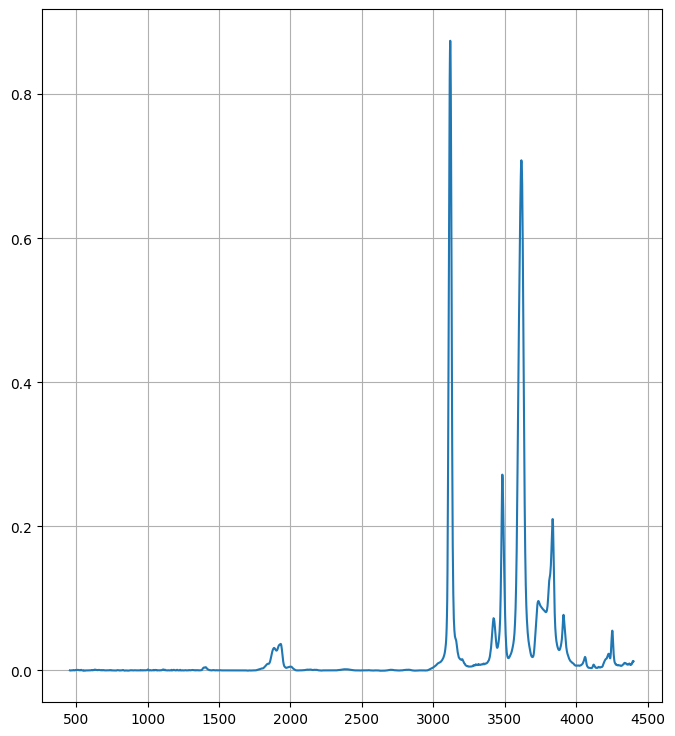

In [9]:
spectr = pd.Series(sp, index=xlbv) #
spectr.plot(figsize=(8,9), grid=True)